In [24]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import scipy.stats as stats
from scipy.stats import poisson

In [25]:
import pandas as pd

#Read the datafile of selected features from statistical analysis
df = pd.read_excel(r'df_new.xls',index_col=0)

In [26]:
df

,hsa-mir-30a:hsa-miR-30a-3p,hsa-mir-550a-1:hsa-miR-550a-3p,hsa-mir-29a:hsa-miR-29a-3p,hsa-mir-628:hsa-miR-628-3p,hsa-mir-26a-2:hsa-miR-26a-5p,hsa-mir-106b:hsa-miR-106b-5p,hsa-mir-4781:hsa-miR-4781-3p,hsa-mir-10b:hsa-miR-10b-5p,hsa-mir-215:hsa-miR-215,hsa-mir-548aj-2:hsa-miR-548g-5p,...,brain-mir-431:brain-mir-431,brain-mir-23:brain-mir-23,brain-mir-427:brain-mir-427,brain-mir-392:brain-mir-392,brain-mir-192:brain-mir-192,brain-mir-53:brain-mir-53,brain-mir-112:brain-mir-112,brain-mir-159:brain-mir-159,brain-mir-328:brain-mir-328,class
AD.1,132.885714,958.457143,78.957143,0.000000,3546.471429,117.857143,21.828571,902.114286,6335.742857,1.100000,...,7.285714,21.828571,12.471429,13.142857,6.385714,2.571429,13.571429,310.414286,7.285714,1
AD.2,282.371429,794.542857,64.457143,1.542857,14464.157143,40.428571,35.728571,1840.628571,3969.000000,5.157143,...,13.142857,23.942857,18.285714,16.985714,10.485714,7.414286,18.285714,297.985714,16.371429,1
AD.3,179.371429,541.785714,69.814286,2.800000,8648.271429,18.542857,23.057143,1459.242857,2045.757143,2.800000,...,2.800000,19.085714,29.200000,11.400000,5.600000,11.400000,14.871429,275.814286,16.185714,1
AD.4,115.700000,1011.342857,65.542857,0.942857,7038.985714,72.342857,31.471429,289.042857,2860.557143,4.714286,...,9.514286,28.257143,3.714286,9.514286,7.185714,13.442857,19.800000,275.814286,14.757143,1
AD.5,89.857143,429.757143,32.228571,0.000000,4315.285714,84.800000,27.728571,148.500000,1621.442857,1.357143,...,15.428571,9.514286,37.728571,27.728571,10.600000,15.428571,10.600000,187.242857,6.457143,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AD.43,106.742857,339.700000,48.514286,2.728571,8317.371429,65.542857,25.671429,1621.442857,3969.000000,9.257143,...,1.585714,9.257143,5.114286,1.585714,2.728571,19.614286,13.342857,157.785714,18.914286,1
AD.44,117.857143,207.271429,66.700000,3.028571,5995.142857,202.771429,24.185714,771.614286,5080.557143,7.614286,...,6.685714,13.700000,5.042857,0.000000,1.014286,6.242857,4.471429,100.871429,9.642857,1
AD.45,175.642857,481.685714,59.871429,3.285714,8317.371429,47.671429,37.728571,1291.942857,3969.000000,3.285714,...,11.885714,20.085714,24.185714,16.514286,13.014286,14.871429,19.085714,250.485714,11.400000,1
AD.46,157.785714,349.342857,26.000000,16.514286,8317.371429,33.728571,37.728571,275.814286,1548.071429,0.000000,...,0.000000,5.942857,7.885714,54.371429,10.071429,7.885714,21.828571,297.985714,16.514286,1


### Univariate Selection

In [27]:
#Select the columns of features
X=df.loc[: , df.columns != 'class']
X

,hsa-mir-30a:hsa-miR-30a-3p,hsa-mir-550a-1:hsa-miR-550a-3p,hsa-mir-29a:hsa-miR-29a-3p,hsa-mir-628:hsa-miR-628-3p,hsa-mir-26a-2:hsa-miR-26a-5p,hsa-mir-106b:hsa-miR-106b-5p,hsa-mir-4781:hsa-miR-4781-3p,hsa-mir-10b:hsa-miR-10b-5p,hsa-mir-215:hsa-miR-215,hsa-mir-548aj-2:hsa-miR-548g-5p,...,brain-mir-413:brain-mir-413,brain-mir-431:brain-mir-431,brain-mir-23:brain-mir-23,brain-mir-427:brain-mir-427,brain-mir-392:brain-mir-392,brain-mir-192:brain-mir-192,brain-mir-53:brain-mir-53,brain-mir-112:brain-mir-112,brain-mir-159:brain-mir-159,brain-mir-328:brain-mir-328
AD.1,132.885714,958.457143,78.957143,0.000000,3546.471429,117.857143,21.828571,902.114286,6335.742857,1.100000,...,6.385714,7.285714,21.828571,12.471429,13.142857,6.385714,2.571429,13.571429,310.414286,7.285714
AD.2,282.371429,794.542857,64.457143,1.542857,14464.157143,40.428571,35.728571,1840.628571,3969.000000,5.157143,...,2.671429,13.142857,23.942857,18.285714,16.985714,10.485714,7.414286,18.285714,297.985714,16.371429
AD.3,179.371429,541.785714,69.814286,2.800000,8648.271429,18.542857,23.057143,1459.242857,2045.757143,2.800000,...,6.942857,2.800000,19.085714,29.200000,11.400000,5.600000,11.400000,14.871429,275.814286,16.185714
AD.4,115.700000,1011.342857,65.542857,0.942857,7038.985714,72.342857,31.471429,289.042857,2860.557143,4.714286,...,4.714286,9.514286,28.257143,3.714286,9.514286,7.185714,13.442857,19.800000,275.814286,14.757143
AD.5,89.857143,429.757143,32.228571,0.000000,4315.285714,84.800000,27.728571,148.500000,1621.442857,1.357143,...,1.357143,15.428571,9.514286,37.728571,27.728571,10.600000,15.428571,10.600000,187.242857,6.457143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AD.43,106.742857,339.700000,48.514286,2.728571,8317.371429,65.542857,25.671429,1621.442857,3969.000000,9.257143,...,0.000000,1.585714,9.257143,5.114286,1.585714,2.728571,19.614286,13.342857,157.785714,18.914286
AD.44,117.857143,207.271429,66.700000,3.028571,5995.142857,202.771429,24.185714,771.614286,5080.557143,7.614286,...,1.785714,6.685714,13.700000,5.042857,0.000000,1.014286,6.242857,4.471429,100.871429,9.642857
AD.45,175.642857,481.685714,59.871429,3.285714,8317.371429,47.671429,37.728571,1291.942857,3969.000000,3.285714,...,2.442857,11.885714,20.085714,24.185714,16.514286,13.014286,14.871429,19.085714,250.485714,11.400000
AD.46,157.785714,349.342857,26.000000,16.514286,8317.371429,33.728571,37.728571,275.814286,1548.071429,0.000000,...,10.071429,0.000000,5.942857,7.885714,54.371429,10.071429,7.885714,21.828571,297.985714,16.514286


In [28]:
#Select the class column
Y=df.loc[: , df.columns == 'class']
Y

,class
AD.1,1
AD.2,1
AD.3,1
AD.4,1
AD.5,1
...,...
AD.43,1
AD.44,1
AD.45,1
AD.46,1


In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

best_features = SelectKBest(score_func=chi2, k=10)
best_features.fit(X,Y)

scores = pd.DataFrame(best_features.scores_)
columns = pd.DataFrame(X.columns)

#combine the two dataframes
feature_scores = pd.concat([columns,scores],axis=1)
feature_scores.columns = ['Feature','Score'] 
selected_features = feature_scores.nlargest(219,'Score')

df_219F = df[selected_features['Feature'].values]
#add the class column
df_219F['class'] = Y
df_219F.head()

,hsa-mir-92b:hsa-miR-92b-3p,hsa-mir-484:hsa-miR-484,hsa-mir-30d:hsa-miR-30d-5p,hsa-let-7a-2:hsa-let-7a-5p,hsa-let-7a-1:hsa-let-7a-5p,hsa-let-7a-3:hsa-let-7a-5p,hsa-mir-30a:hsa-miR-30a-5p,hsa-let-7f-2:hsa-let-7f-5p,hsa-mir-148a:hsa-miR-148a-3p,hsa-mir-425:hsa-miR-425-5p,...,hsa-let-7f-1:hsa-let-7f-1-3p,hsa-mir-3614:hsa-miR-3614-5p,hsa-mir-659:hsa-miR-659-5p,hsa-mir-874:hsa-miR-874,brain-mir-328:brain-mir-328,hsa-mir-199a-1:hsa-miR-199a-5p,hsa-mir-199a-2:hsa-miR-199a-5p,hsa-mir-191:hsa-miR-191-3p,hsa-mir-4792:hsa-miR-4792,class
AD.1,44281.771429,28534.842857,18412.171429,14464.157143,13483.985714,12957.585714,19986.471429,12292.485714,689.014286,8317.371429,...,11.142857,4.914286,10.257143,15.585714,7.285714,35.728571,35.728571,12.471429,2.571429,1
AD.2,75224.671429,38774.300000,19986.471429,12957.585714,12292.485714,11795.185714,18412.171429,11305.157143,467.342857,5287.057143,...,9.128571,2.671429,5.157143,5.157143,16.371429,17.871429,17.871429,10.485714,0.000000,1
AD.3,75224.671429,28534.842857,22008.228571,19986.471429,18412.171429,17337.628571,14464.157143,16431.185714,328.071429,7038.985714,...,13.014286,8.157143,16.185714,1.357143,16.185714,41.828571,41.828571,22.071429,1.357143,1
AD.4,75224.671429,33664.228571,19986.471429,14464.157143,13483.985714,12957.585714,16431.185714,12292.485714,376.457143,4888.300000,...,13.442857,2.671429,12.157143,10.171429,14.757143,26.000000,26.000000,13.442857,0.942857,1
AD.5,75224.671429,28534.842857,9603.485714,18412.171429,17337.628571,16431.185714,10289.771429,15264.714286,357.028571,3755.471429,...,1.357143,5.114286,5.114286,9.514286,6.457143,1.357143,1.357143,12.471429,0.000000,1


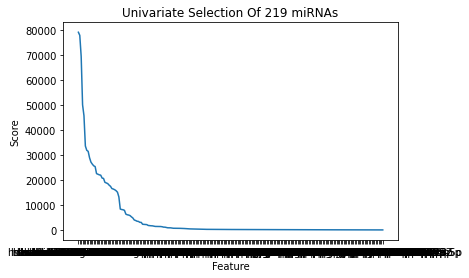

In [30]:
import matplotlib.pyplot as plt

plt.plot(  selected_features["Feature"], selected_features["Score"], label='linear')

plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Univariate Selection Of 219 miRNAs')
plt.show()

### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
         
model = RandomForestClassifier(n_estimators=10000,  n_jobs=-1)
model.fit(X,Y)

#Select the best 50 features depend on feature importances
important_features = pd.Series(model.feature_importances_, index=X.columns)
selected_features_rf = important_features.nlargest(50)
selected_features_rf.to_excel("random_50.xls")

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


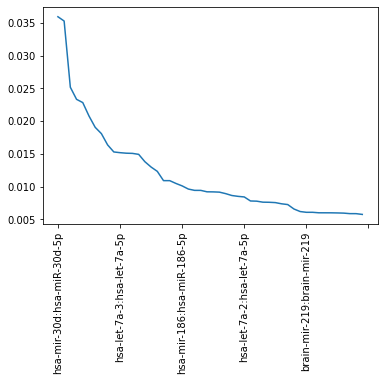

In [32]:
#Selected miRNAs
pl = rf_sel.plot(rot=90)

In [33]:
from sklearn import preprocessing

#Defining a function to normalize a dataframe
def dfNormalize(df):
    minMaxScaler = preprocessing.MinMaxScaler(feature_range=(1, 2))
    X_scaled = minMaxScaler.fit_transform(df)
    df_norm = pd.DataFrame(X_scaled, columns = df.columns, index = df.index)
    return df_norm

In [34]:
#Create the dataframe for selected miRNAs from random forest
df_rf = df[pd.DataFrame(rf_sel).T.columns]

#normalized values upto 2 decimal points
df_rf_norm = round(dfNormalize(df_rf),2)
df_rf_norm.head()

,hsa-mir-30d:hsa-miR-30d-5p,hsa-mir-144:hsa-miR-144-5p,hsa-mir-4781:hsa-miR-4781-3p,brain-mir-112:brain-mir-112,hsa-let-7a-1:hsa-let-7a-5p,hsa-let-7f-1:hsa-let-7f-5p,hsa-let-7f-2:hsa-let-7f-5p,hsa-mir-3157:hsa-miR-3157-3p,hsa-mir-148b:hsa-miR-148b-5p,hsa-mir-151a:hsa-miR-151a-3p,...,brain-mir-219:brain-mir-219,hsa-mir-128-2:hsa-miR-128,hsa-let-7c:hsa-let-7c,hsa-mir-3909:hsa-miR-3909,hsa-mir-589:hsa-miR-589-5p,hsa-mir-30a:hsa-miR-30a-5p,hsa-mir-548h-5:hsa-miR-548h-5p,hsa-mir-144:hsa-miR-144-3p,hsa-let-7e:hsa-let-7e-5p,hsa-mir-101-2:hsa-miR-101-3p
AD.1,1.55,1.11,1.30,1.25,1.21,1.30,1.27,1.36,1.62,1.10,...,1.40,1.31,1.10,1.37,1.43,1.73,1.04,1.04,1.29,1.19
AD.2,1.62,1.05,1.48,1.35,1.17,1.22,1.22,1.42,1.63,1.44,...,2.00,1.40,1.05,1.36,1.26,1.65,1.17,1.01,1.12,1.04
AD.3,1.71,1.04,1.31,1.28,1.37,1.48,1.45,1.41,1.42,1.33,...,1.78,1.44,1.17,1.28,1.07,1.45,1.09,1.01,1.55,1.04
AD.4,1.62,1.07,1.43,1.38,1.21,1.30,1.27,1.53,1.69,1.23,...,1.81,1.40,1.13,1.53,1.34,1.55,1.24,1.02,1.44,1.05
AD.5,1.16,1.21,1.38,1.19,1.33,1.44,1.40,1.04,1.45,1.08,...,1.24,1.12,1.45,1.24,1.62,1.24,1.05,1.06,1.86,1.13


### PCA

In [35]:
from sklearn.decomposition import PCA

X = df.iloc[:,0:219].values
features = df.columns[0:219].values

model = PCA(n_components=69).fit(X)
X_pc = model.transform(X)

#Number of components
n_pcs= model.components_.shape[0]

#Get the index of the most important feature on each component
most_important_index = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

#Get the names of the most important features
most_important_features = [features[most_important_index[i]] for i in range(n_pcs)]

#Create the dataframe for selected miRNAs from PCA
df_PCA = df[most_important_features]

df_PCA = df_PCA.T.drop_duplicates().T


df_PCA.head()

,hsa-mir-92b:hsa-miR-92b-3p,hsa-mir-25:hsa-miR-25-3p,hsa-mir-484:hsa-miR-484,hsa-mir-30d:hsa-miR-30d-5p,hsa-let-7c:hsa-let-7c,hsa-mir-423:hsa-miR-423-3p,hsa-mir-363:hsa-miR-363-3p,hsa-mir-215:hsa-miR-215,hsa-mir-3615:hsa-miR-3615,hsa-mir-186:hsa-miR-186-5p,...,hsa-mir-1304:hsa-miR-1304-3p,hsa-mir-98:hsa-miR-98,brain-mir-159:brain-mir-159,hsa-mir-93:hsa-miR-93-3p,hsa-mir-3605:hsa-miR-3605-3p,hsa-mir-589:hsa-miR-589-5p,hsa-mir-126:hsa-miR-126-3p,hsa-mir-5010:hsa-miR-5010-3p,hsa-mir-1307:hsa-miR-1307-3p,hsa-mir-4781:hsa-miR-4781-3p
AD.1,44281.771429,33664.228571,28534.842857,18412.171429,7977.442857,15264.714286,5995.142857,6335.742857,3755.471429,9603.485714,...,207.271429,113.742857,310.414286,262.100000,398.157143,529.414286,47.671429,207.271429,145.442857,21.828571
AD.2,75224.671429,44281.771429,38774.300000,19986.471429,6335.742857,15264.714286,7977.442857,3969.000000,9137.385714,4888.300000,...,179.371429,109.128571,297.985714,226.371429,541.785714,388.457143,50.442857,250.485714,64.457143,35.728571
AD.3,75224.671429,44281.771429,28534.842857,22008.228571,10289.771429,13483.985714,7467.342857,2045.757143,4888.300000,3285.814286,...,256.671429,175.642857,275.814286,333.728571,672.414286,230.585714,91.342857,282.371429,86.685714,23.057143
AD.4,75224.671429,44281.771429,33664.228571,19986.471429,9137.385714,17337.628571,8648.271429,2860.557143,5080.557143,5287.057143,...,239.971429,212.042857,275.814286,289.042857,638.942857,454.614286,66.700000,236.157143,46.071429,31.471429
AD.5,75224.671429,55604.657143,28534.842857,9603.485714,19986.471429,12292.485714,6335.742857,1621.442857,4888.300000,3285.814286,...,152.628571,161.114286,187.242857,195.014286,398.157143,689.014286,70.928571,187.242857,304.814286,27.728571


In [36]:
best_features_pca = SelectKBest(score_func=chi2, k=10)
best_features_pca.fit(df_PCA,Y)
scores_pca = pd.DataFrame(best_features_pca.scores_)
columns_pca = pd.DataFrame(df_PCA.columns)

feature_scores = pd.concat([columns_pca,scores_pca],axis=1)
feature_scores.columns = ['Features','Score'] 

selected_features_pca = feature_scores.nlargest(50,'Score')
selected_features_pca.to_excel("pca_50.xls")

pca_array = feature_scores[["Features"]].to_numpy()

pd.options.mode.chained_assignment = None

df_PCA = df[selected_features_pca['Features'].values]

#Round the normalized values upto 2 decimal points
df_PCA_norm = round(dfNormalize(df_PCA),2)
df_PCA_norm.head()

,hsa-mir-92b:hsa-miR-92b-3p,hsa-mir-484:hsa-miR-484,hsa-mir-30d:hsa-miR-30d-5p,hsa-let-7a-1:hsa-let-7a-5p,hsa-let-7f-2:hsa-let-7f-5p,hsa-mir-148a:hsa-miR-148a-3p,hsa-let-7f-1:hsa-let-7f-5p,hsa-mir-363:hsa-miR-363-3p,hsa-let-7g:hsa-let-7g-5p,hsa-mir-151a:hsa-miR-151a-3p,...,hsa-mir-3158-2:hsa-miR-3158-3p,hsa-mir-550a-2:hsa-miR-550a-3p,hsa-mir-576:hsa-miR-576-5p,hsa-mir-339:hsa-miR-339-3p,hsa-let-7d:hsa-let-7d-5p,brain-mir-159:brain-mir-159,hsa-mir-4781:hsa-miR-4781-3p,hsa-mir-185:hsa-miR-185-5p,hsa-mir-1307:hsa-miR-1307-3p,hsa-mir-93:hsa-miR-93-3p
AD.1,1.39,1.22,1.55,1.21,1.27,1.09,1.30,1.17,1.11,1.10,...,1.74,1.84,1.58,1.31,1.17,1.51,1.30,1.20,1.31,1.46
AD.2,1.72,1.33,1.62,1.17,1.22,1.05,1.22,1.28,1.09,1.44,...,1.35,1.68,1.47,1.54,1.17,1.48,1.48,1.09,1.10,1.37
AD.3,1.72,1.22,1.71,1.37,1.45,1.03,1.48,1.25,1.17,1.33,...,1.47,1.44,1.41,1.17,1.57,1.44,1.31,1.05,1.16,1.63
AD.4,1.72,1.27,1.62,1.21,1.27,1.04,1.30,1.31,1.15,1.23,...,1.47,1.89,1.82,1.41,1.31,1.44,1.43,1.10,1.05,1.52
AD.5,1.72,1.22,1.16,1.33,1.40,1.03,1.44,1.19,1.39,1.08,...,1.58,1.33,1.04,1.28,1.38,1.28,1.38,1.28,1.72,1.30


### Venn Diagram

In [37]:
#Import libraries
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

In [38]:
#Features selected from random forest, put into an array
rf_array = ['hsa-mir-30d:hsa-miR-30d-5p',
'hsa-mir-144:hsa-miR-144-5p',
'hsa-mir-4781:hsa-miR-4781-3p',
'hsa-let-7a-1:hsa-let-7a-5p',
'brain-mir-112:brain-mir-112',
'hsa-let-7f-1:hsa-let-7f-5p',
'hsa-mir-3157:hsa-miR-3157-3p',
'hsa-let-7f-2:hsa-let-7f-5p',
'hsa-mir-151a:hsa-miR-151a-3p',
'hsa-let-7g:hsa-let-7g-5p',
'hsa-let-7a-3:hsa-let-7a-5p',
'hsa-mir-425:hsa-miR-425-5p',
'hsa-mir-17:hsa-miR-17-3p',
'hsa-mir-148b:hsa-miR-148b-5p',
'hsa-mir-98:hsa-miR-98',
'hsa-mir-5001:hsa-miR-5001-3p',
'hsa-mir-15a:hsa-miR-15a-5p',
'hsa-mir-1285-1:hsa-miR-1285-5p',
'hsa-mir-148a:hsa-miR-148a-3p',
'hsa-mir-186:hsa-miR-186-5p',
'hsa-mir-29b-2:hsa-miR-29b-3p',
'hsa-mir-29b-1:hsa-miR-29b-3p',
'hsa-mir-1294:hsa-miR-1294',
'brain-mir-431:brain-mir-431',
'hsa-mir-550a-3:hsa-miR-550a-3-5p',
'hsa-mir-199b:hsa-miR-199a-3p',
'hsa-mir-199a-1:hsa-miR-199b-3p',
'hsa-mir-199a-2:hsa-miR-199a-3p',
'hsa-mir-29c:hsa-miR-29c-3p',
'hsa-mir-550a-1:hsa-miR-550a-5p',
'hsa-mir-550a-2:hsa-miR-550a-5p',
'hsa-mir-199a-2:hsa-miR-199b-3p',
'hsa-mir-199b:hsa-miR-199b-3p',
'hsa-mir-550a-1:hsa-miR-550a-3-5p',
'hsa-let-7a-2:hsa-let-7a-5p',
'hsa-mir-29a:hsa-miR-29a-3p',
'hsa-mir-199a-1:hsa-miR-199a-3p',
'brain-mir-219:brain-mir-219',
'hsa-mir-550a-2:hsa-miR-550a-3-5p',
'hsa-mir-99b:hsa-miR-99b-5p',
'hsa-mir-144:hsa-miR-144-3p',
'hsa-mir-30a:hsa-miR-30a-5p',
'hsa-mir-378a:hsa-miR-378a-5p',
'hsa-mir-128-2:hsa-miR-128',
'hsa-mir-2110:hsa-miR-2110',
'hsa-mir-589:hsa-miR-589-5p',
'hsa-mir-548h-5:hsa-miR-548h-5p',
'hsa-mir-3909:hsa-miR-3909',
'hsa-mir-625:hsa-miR-625-5p',
'hsa-mir-24-1:hsa-miR-24-3p',
]

In [39]:
#Features selected from PCA, put into an array
pca_array = ['hsa-mir-92b:hsa-miR-92b-3p',
'hsa-mir-484:hsa-miR-484',
'hsa-mir-30d:hsa-miR-30d-5p',
'hsa-let-7a-1:hsa-let-7a-5p',
'hsa-let-7f-2:hsa-let-7f-5p',
'hsa-mir-148a:hsa-miR-148a-3p',
'hsa-let-7f-1:hsa-let-7f-5p',
'hsa-mir-363:hsa-miR-363-3p',
'hsa-let-7g:hsa-let-7g-5p',
'hsa-mir-151a:hsa-miR-151a-3p',
'hsa-let-7e:hsa-let-7e-5p',
'hsa-mir-186:hsa-miR-186-5p',
'hsa-let-7c:hsa-let-7c',
'hsa-mir-15a:hsa-miR-15a-5p',
'hsa-mir-423:hsa-miR-423-3p',
'hsa-mir-144:hsa-miR-144-5p',
'hsa-mir-215:hsa-miR-215',
'hsa-mir-103a-1:hsa-miR-103a-3p',
'hsa-mir-3615:hsa-miR-3615',
'hsa-let-7b:hsa-let-7b-5p',
'hsa-mir-106b:hsa-miR-106b-3p',
'hsa-mir-128-1:hsa-miR-128',
'hsa-mir-28:hsa-miR-28-3p',
'hsa-mir-1260b:hsa-miR-1260b',
'hsa-let-7d:hsa-let-7d-3p',
'hsa-mir-25:hsa-miR-25-3p',
'hsa-mir-942:hsa-miR-942',
'hsa-mir-3605:hsa-miR-3605-3p',
'hsa-mir-151b:hsa-miR-151b',
'hsa-mir-223:hsa-miR-223-3p',
'hsa-mir-98:hsa-miR-98',
'hsa-mir-125a:hsa-miR-125a-5p',
'hsa-mir-126:hsa-miR-126-3p',
'hsa-mir-148b:hsa-miR-148b-3p',
'hsa-mir-144:hsa-miR-144-3p',
'hsa-mir-143:hsa-miR-143-3p',
'hsa-mir-345:hsa-miR-345-5p',
'hsa-mir-5010:hsa-miR-5010-3p',
'hsa-mir-99b:hsa-miR-99b-5p',
'hsa-mir-589:hsa-miR-589-5p',
'hsa-mir-3158-2:hsa-miR-3158-3p',
'hsa-mir-550a-1:hsa-miR-550a-3p',
'hsa-mir-30a:hsa-miR-30a-3p',
'hsa-mir-576:hsa-miR-576-5p',
'hsa-mir-339:hsa-miR-339-3p',
'hsa-let-7d:hsa-let-7d-5p',
'brain-mir-159:brain-mir-159',
'hsa-mir-185:hsa-miR-185-5p',
'hsa-mir-1307:hsa-miR-1307-3p',
'hsa-mir-93:hsa-miR-93-3p',
]

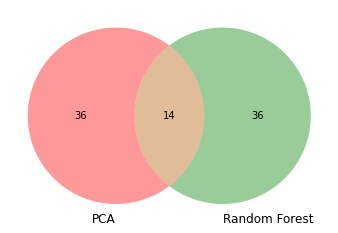

In [40]:
#Method1: put two datasets directly
venn2([set(pca_array), set(rf_array)],set_labels=('PCA', 'Random Forest'))
plt.show()